# Data Science Bootcamp project

## Libraries

In [2]:
import numpy as np
import pandas as pd
import re
import bootcampviztools as bt
from scipy.stats import chi2_contingency, mannwhitneyu, norm
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis - Features against the target

In [4]:
df_cardiovascular = pd.read_csv("Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_cleaned.csv")

In [5]:
df = df_cardiovascular.copy()

We start the analysis with the plots and the correlations against the target, which is binary as it is shown in the univariant analysis. 

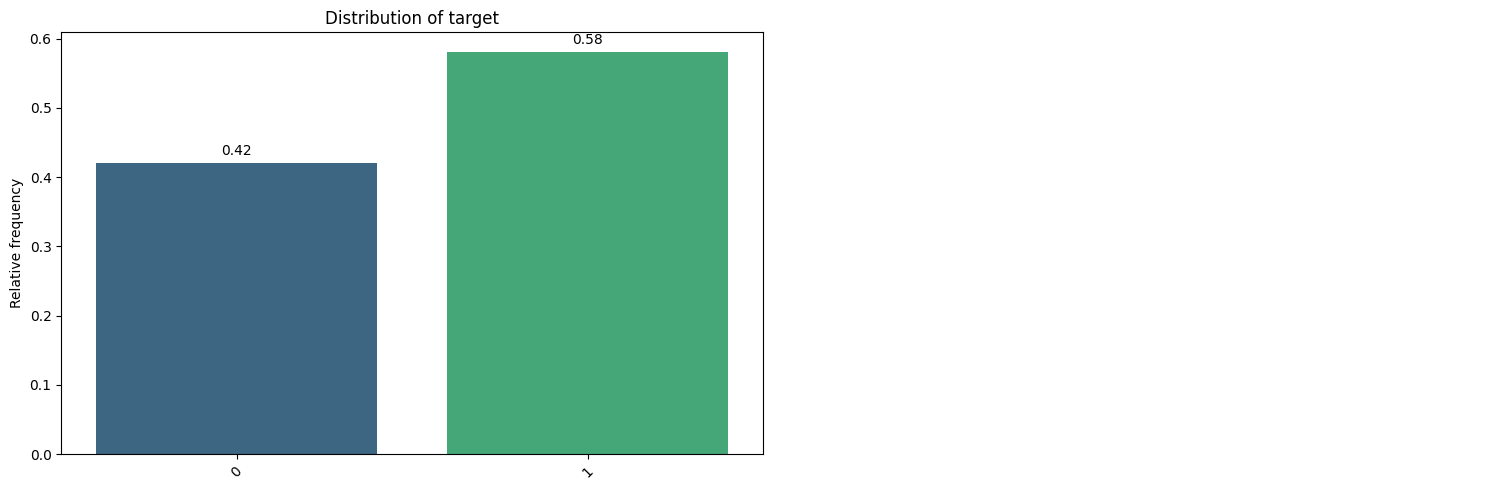

In [5]:
bt.pinta_distribucion_categoricas(df, ['target'], mostrar_valores = True, relativa = True)

From the univariant analysis, we extracted the following information:

In [7]:
categorical = ["chestpain","restingrelectro", "slope","noofmajorvessels", "gender", "fastingbloodsugar", "exerciseangia"] #without target
numerical = ["age","restingBP","serumcholestrol","maxheartrate", "oldpeak"]

Next, we will analyze all the numerical and categorical features against the target

### Numerical

In [7]:
# We study the correlations and the map of correlations

corr = df.corr(numeric_only= True)
corr['target']

patientid           -0.005637
age                  0.008356
gender               0.015769
chestpain            0.554228
restingBP            0.482387
serumcholestrol      0.195340
fastingbloodsugar    0.303233
restingrelectro      0.426837
maxheartrate         0.228343
exerciseangia       -0.039874
oldpeak              0.098053
slope                0.759849
noofmajorvessels     0.489866
target               1.000000
Name: target, dtype: float64

Although in this correlation are all the features (as technically they are numeric), we must take into account only those features that are in the numerical list.

In [8]:
corr_num = corr.copy()
corr_num = corr_num.loc[["age","restingBP","serumcholestrol","maxheartrate", "oldpeak", "target"],["age","restingBP","serumcholestrol","maxheartrate", "oldpeak", "target"]]

In [9]:
corr_num

,age,restingBP,serumcholestrol,maxheartrate,oldpeak,target
age,1.000000,-0.016126,0.035439,-0.040092,-0.026020,0.008356
restingBP,-0.016126,1.000000,0.126523,0.095569,-0.004225,0.482387
serumcholestrol,0.035439,0.126523,1.000000,0.038967,-0.025910,0.195340
maxheartrate,-0.040092,0.095569,0.038967,1.000000,0.044614,0.228343
oldpeak,-0.026020,-0.004225,-0.025910,0.044614,1.000000,0.098053
target,0.008356,0.482387,0.195340,0.228343,0.098053,1.000000


<Axes: >

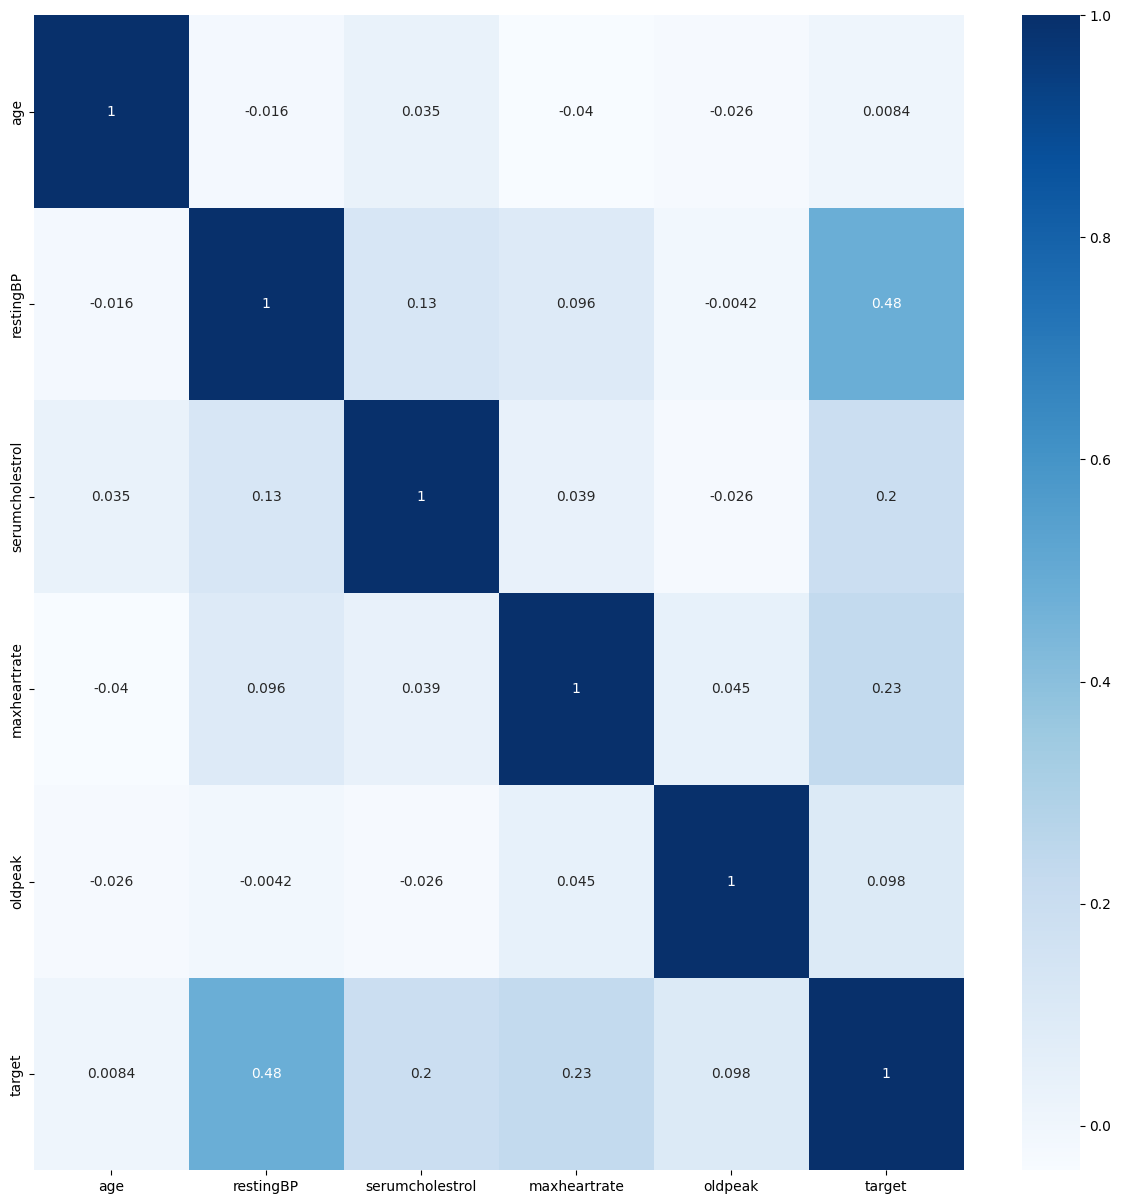

In [10]:
plt.figure(figsize= (15,15))
sns.heatmap(corr_num, annot= True, cmap = "Blues")

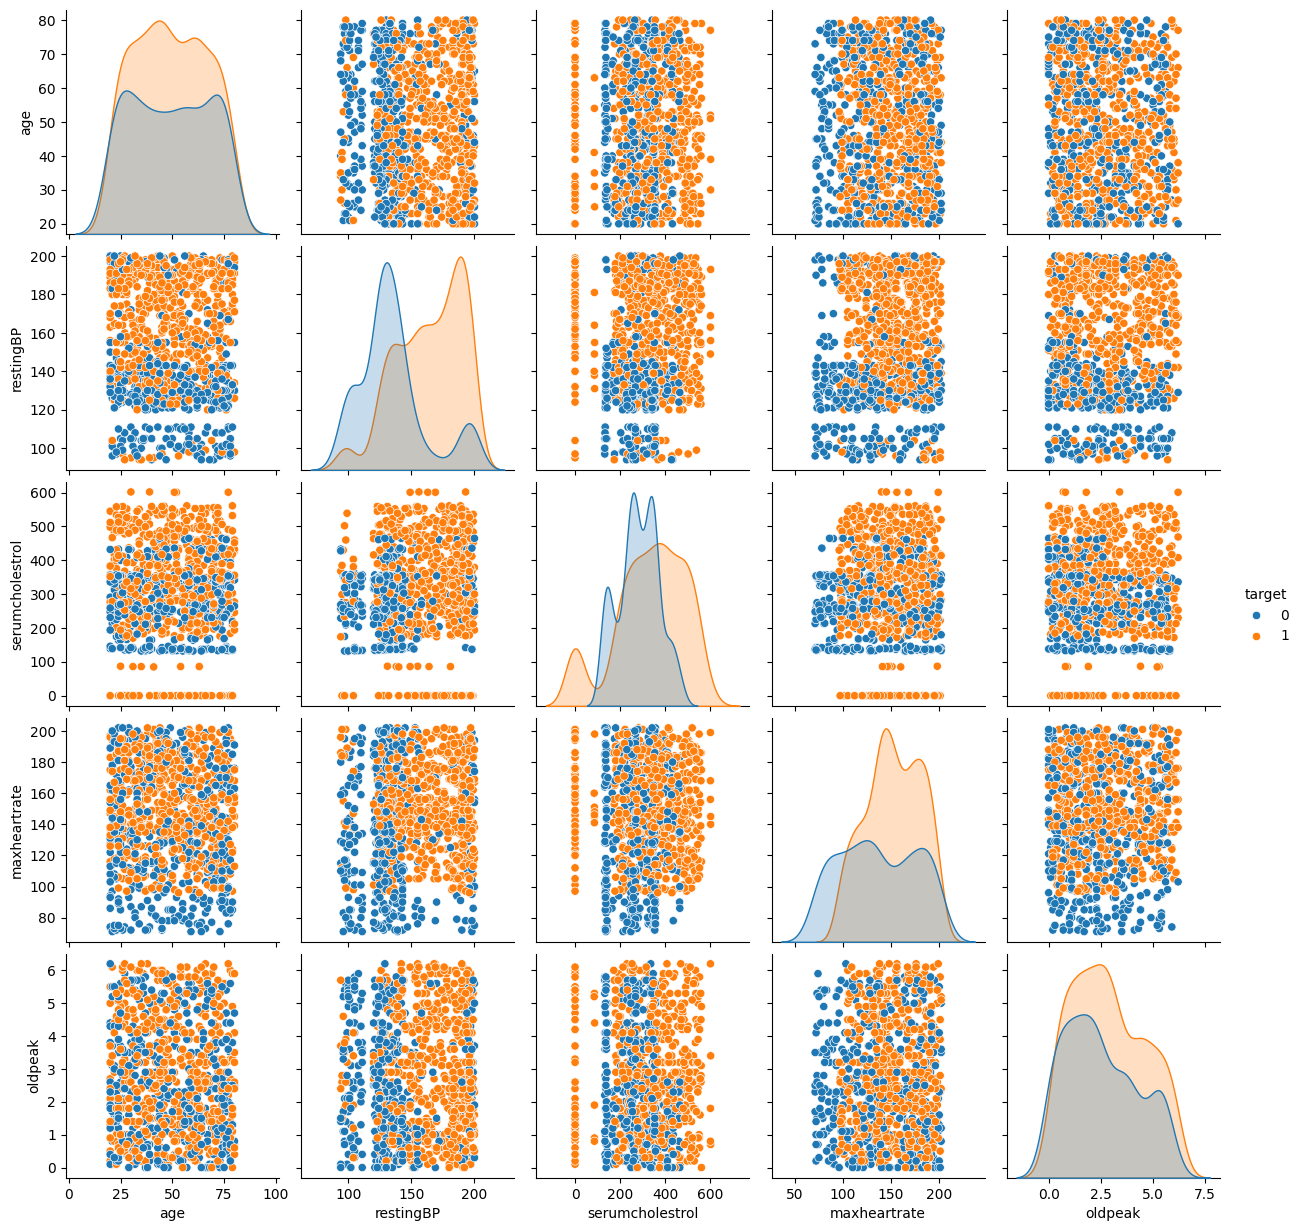

In [11]:
sns.pairplot(df[numerical + ['target']], hue = 'target')

Keeping only relevant variables can reduce the dimensionality of the dataset. The aim is to improve computational efficiency. For this purpose, we will keep those variables that have a correlation |r|>0.1 with the target. Therefore, we will drop oldpeak and age features.

We can see in the pairplot and in the heatmap that the numerical features don't have a clear correlation between them (without taking into account the target feature) as the scatter plot show scattered points without following any specific pattern. The only exception is the serumcholesterol and the restingBP, which have a correlation of 0.13 but in the heatmap we cannot see any clear correlation as it's not lineal. 

### Categorical

We will analyze each feature obtaining its chi-square against the target.

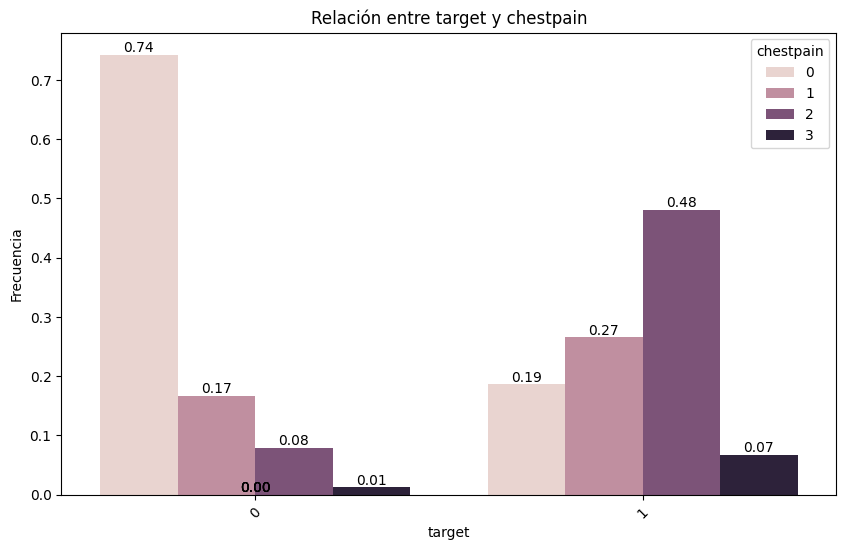

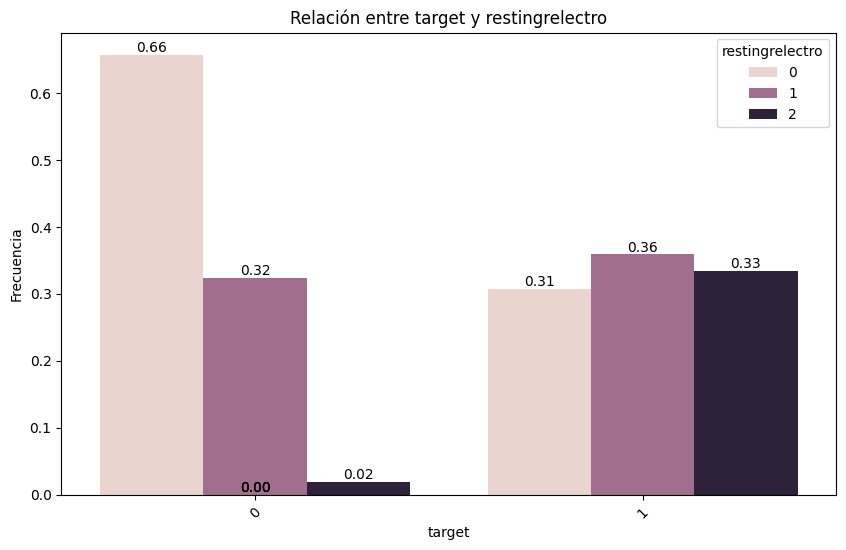

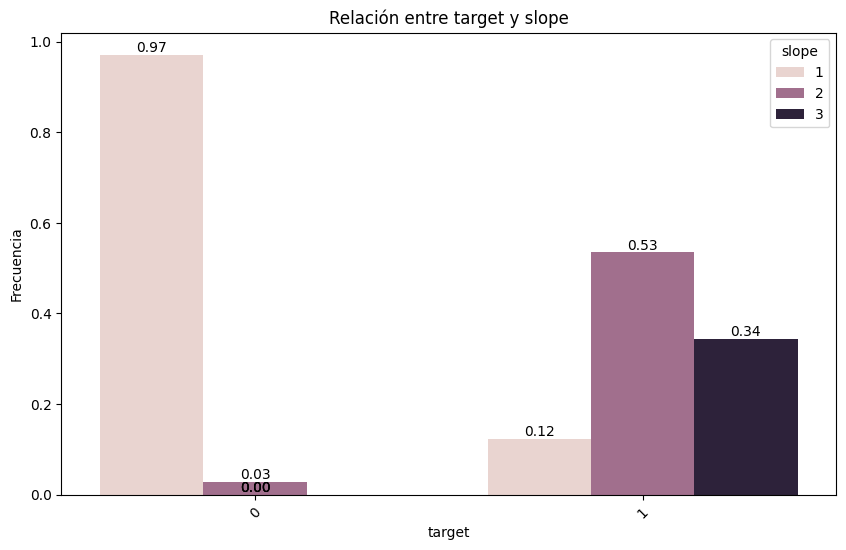

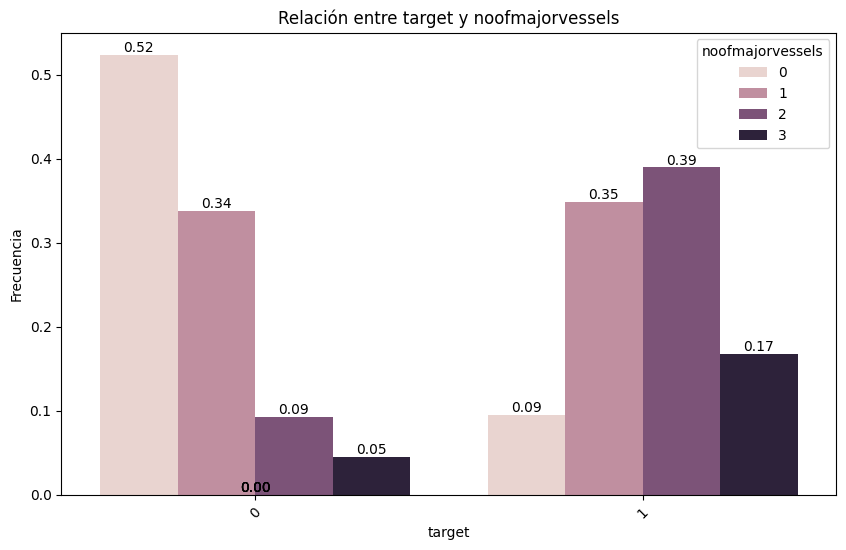

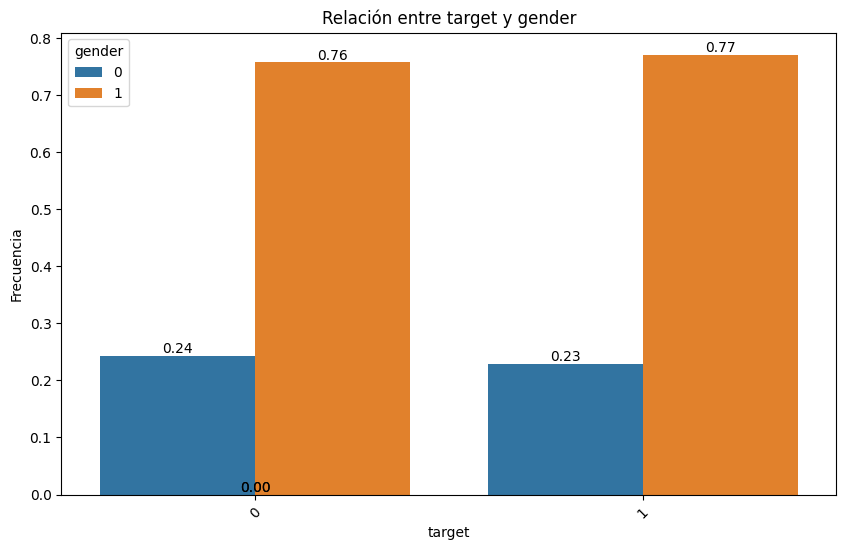

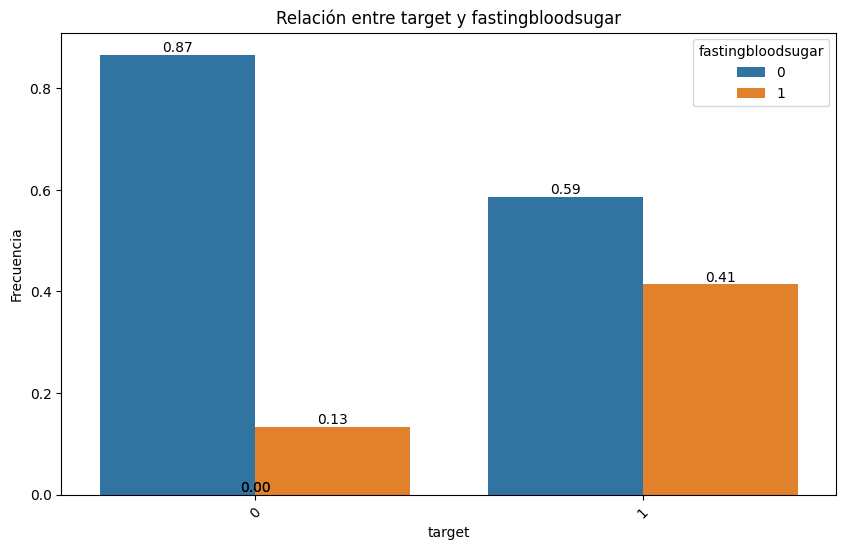

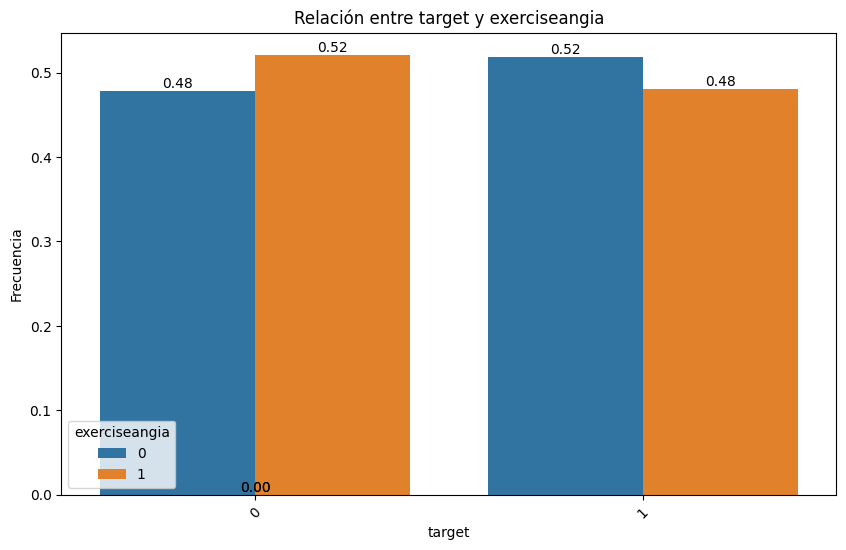

In [12]:
for feat in categorical:
    bt.plot_categorical_relationship_fin(df, 'target', feat, show_values= True, relative_freq= True)

In [13]:
for value in categorical:    
    tabla_contingencia = pd.crosstab(df["target"], df[value])
    
    chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
    
    print(f"Chi-Square for {value}: Value Chi-Square:", chi2, "P-Value:", p)

Chi-Square for chestpain: Value Chi-Square: 333.7643473111453 P-Value: 4.885941801865955e-72
Chi-Square for restingrelectro: Value Chi-Square: 186.67003201617422 P-Value: 2.9182169746963627e-41
Chi-Square for slope: Value Chi-Square: 704.3153256144285 P-Value: 1.1478107367810405e-153
Chi-Square for noofmajorvessels: Value Chi-Square: 275.3200766699266 P-Value: 2.1798815028707427e-59
Chi-Square for gender: Value Chi-Square: 0.17902326822960438 P-Value: 0.6722139754451182
Chi-Square for fastingbloodsugar: Value Chi-Square: 90.60953814455968 P-Value: 1.750146562208855e-21
Chi-Square for exerciseangia: Value Chi-Square: 1.4324629850892039 P-Value: 0.23136289827241166


- CHESTPAIN: patients without heart disease have a 74% chance of experiencing type 0 chest pain (typical angina), whereas types 1, 2, and 3 have an incidence of less than 20%. In contrast, those with heart disease show a 48% incidence for type 2, close to 30% for type 1, and less than 20% for the other types.
- RESTINGELECTRO: patients without heart disease show 70% approximately for type 0 (normal), 30% approximately for type 1 (ST-T wave abnormality), and the remainder for type 2 (probable or definite left ventricular hypertrophy). Heart disease patients exhibit a more proportional distribution among types 1, 2, and 3.
- SLOPE: patients without heart disease overwhelmingly have slope = 1 (upsloping) at 97%. Instead, heart disease patients predominantly exhibit slope = 2 (53%), followed by 34% for slope = 3 and 12% for slope = 1.
- NOOFMAJORVESSELS: patients without heart disease mostly have 0 (52%), 1 (34%), 2 (29%), and 3 (5%) major vessels affected. This makes sense in medical theory as the number of major vessels affected indicates poorer heart function. It follows that fewer blocked coronary arteries lead to lower chances of having a heart attack. In contrast, patients with heart disease mostly have 1 or 2 major vessels affected (35% and 39%, respectively).
- GENDER: there is a distributed pattern that seems not to influence the presence of heart disease.
- FASTINGBLOODSUGAR: the majority of patients have fasting blood sugar level = 0 in both targets (less than 120 mg/dl) (87% for those without heart disease and nearly 60% for those with heart disease).
- EXERCISEANGIA: patients are equally distributed, around 50%, for both exerciseangia = 0 (no exercise-induced angina) and exerciseangia = 1 (exercise-induced angina), in both cases of heart disease and no heart disease.

Finally, after the evaluation of the chi-square and the plots, we can say that exerciseangia and gender are variables not significant in the dataset (p-value > 0.05), therefore, they can be droped in future for the machine learning model.

## Exploratory Data Analysis - Features against features

We will analyze for all the features all the correlations and later, we will visualize their plots.

In [51]:
corr_matrix = df.drop(columns=['target']).corr().abs() # We study the correlations and the map of correlations in absolut values
np.fill_diagonal(corr_matrix.values, 0)  # Set diagonal values to 0 since correlation with itself is 1

In [52]:
threshold = 0.1

In [53]:
indices = np.where(corr_matrix > threshold)
correlation_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*indices) if x != y]

In [54]:
# Results
for pair in correlation_pairs:
    correlation_value = corr_matrix.loc[pair[0], pair[1]]
    print(f"Correlation between '{pair[0]}' and '{pair[1]}': {correlation_value}")

Correlation between 'gender' and 'serumcholestrol': 0.12075903967593299
Correlation between 'gender' and 'oldpeak': 0.33145740966251086
Correlation between 'chestpain' and 'restingBP': 0.2222667762866366
Correlation between 'chestpain' and 'serumcholestrol': 0.174730997346845
Correlation between 'chestpain' and 'fastingbloodsugar': 0.23205867764066834
Correlation between 'chestpain' and 'restingrelectro': 0.25631586095706427
Correlation between 'chestpain' and 'maxheartrate': 0.11449586860770207
Correlation between 'chestpain' and 'oldpeak': 0.10134463403230244
Correlation between 'chestpain' and 'slope': 0.45465817314931944
Correlation between 'chestpain' and 'noofmajorvessels': 0.28515567863099894
Correlation between 'restingBP' and 'chestpain': 0.2222667762866366
Correlation between 'restingBP' and 'serumcholestrol': 0.1265230724612208
Correlation between 'restingBP' and 'fastingbloodsugar': 0.1920629869617349
Correlation between 'restingBP' and 'restingrelectro': 0.2198873015927085

We have found those features that are correlated between them with |r|>0.1. We will create a dictionary with these features to have more visibilty of all the features involved.

In [55]:
correlation_dict = {}

# Construction of the correlation dictionary
for x, y in zip(*indices):
    if x != y:
        var1 = corr_matrix.index[x]
        var2 = corr_matrix.columns[y]
        corr_value = corr_matrix.iloc[x, y]
        
        if var1 in correlation_dict:
            correlation_dict[var1].append(var2)
        else:
            correlation_dict[var1] = [var2]

In [56]:
# Show the dictionary
for key, value in correlation_dict.items():
    print(f"{key}: {value}")

gender: ['serumcholestrol', 'oldpeak']
chestpain: ['restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'oldpeak', 'slope', 'noofmajorvessels']
restingBP: ['chestpain', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'slope', 'noofmajorvessels']
serumcholestrol: ['gender', 'chestpain', 'restingBP', 'fastingbloodsugar', 'restingrelectro', 'slope', 'noofmajorvessels']
fastingbloodsugar: ['chestpain', 'restingBP', 'serumcholestrol', 'restingrelectro', 'slope', 'noofmajorvessels']
restingrelectro: ['chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'slope', 'noofmajorvessels']
maxheartrate: ['chestpain', 'slope', 'noofmajorvessels']
oldpeak: ['gender', 'chestpain', 'slope']
slope: ['chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'oldpeak', 'noofmajorvessels']
noofmajorvessels: ['chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 

- It's interesting to see that the feature age does not have any correlation with any other feature, therefore is not included on this dictionary.

- fastingbloodsugar & restingelectro:
Both are correlated with the following variables: chestpain, serumcholesterol, slope, noofmajorvessels, target. This suggests that features are associated with similar metabolic and cardiac aspects.

- chestpain & restingBP: 
Both are correlated with the following variables: serumcholesterol, fasting blood sugar, resting electro, slope, number of major vessels, target.
It indicates a strong association between both features, as well as other cardiac and metabolic parameters.

- slope & maxheartrate:
They are correlated with the following variables: chestpain, noofmajorvessels, target.
It suggests that the cardiac response during exercise is associated with the presence of chest pain and the severity of coronary artery disease.

- Variables such as chestpain, serumcholesterol, fastingbloodsugar, restingelectro, slope, noofmajorvessels and target show a significant interconnection. This suggests that these factors are not only related to multiple aspects of cardiovascular health but also can influence each other. 

Doing their correspondant plots:

- fastingbloodsugar & restingelectro

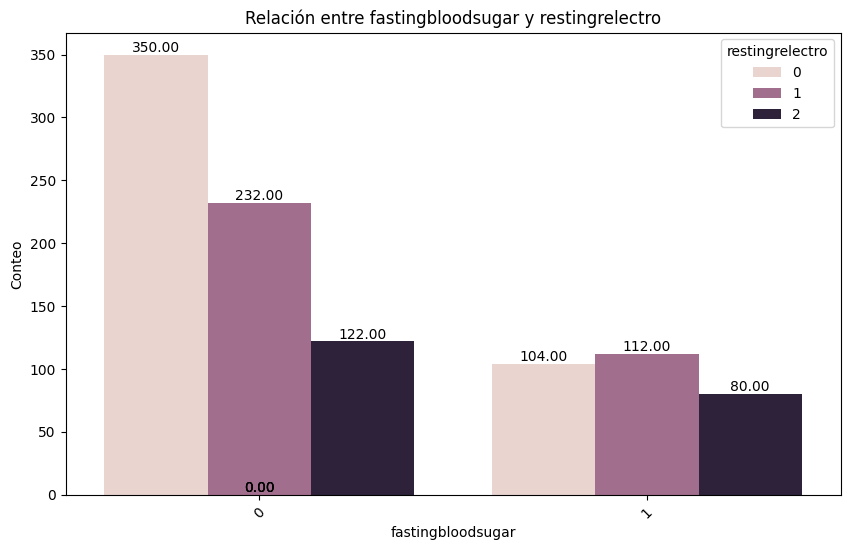

In [20]:
bt.plot_categorical_relationship_fin(df, "fastingbloodsugar","restingrelectro", show_values= True)

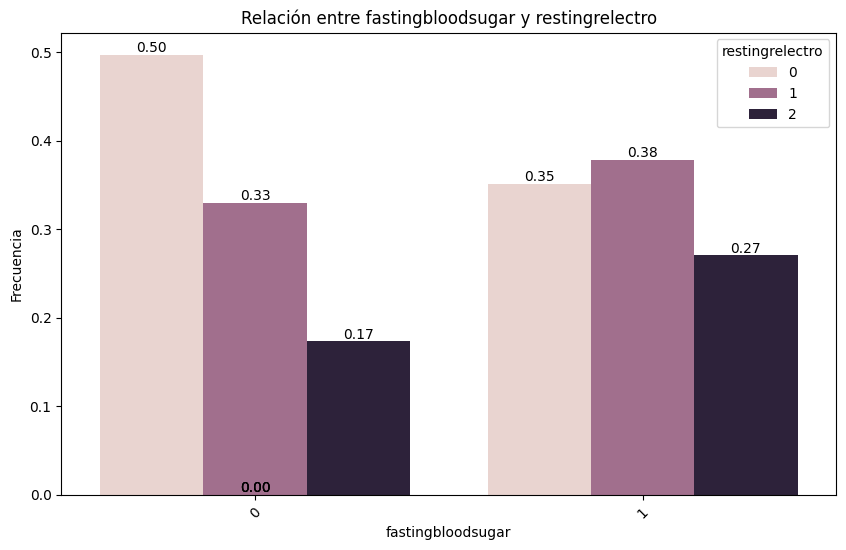

In [21]:
bt.plot_categorical_relationship_fin(df, "fastingbloodsugar","restingrelectro", relative_freq= True, show_values= True)

In [44]:
tabla_contingencia = pd.crosstab(df["fastingbloodsugar"],df["restingrelectro"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Value Chi-Square:", chi2)
print("P-Value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequency Table:\n", expected)

Value Chi-Square: 20.90406721320714
P-Value: 2.888946371651474e-05
Degrees of Freedom: 2
Expected Frequency Table:
 [[319.616 242.176 142.208]
 [134.384 101.824  59.792]]


When fasting blood sugar level is 0 (less than 120 mg/dl), the most common value for resting electrocardiogram is 0 (normal), with a total of 350 patients (50%). This is followed by values 1 (ST-T wave abnormality) with 232 patients (33%) and 2 (probable or definite left ventricular hypertrophy by Estes' criteria) with 122 patients (17%). This demonstrates a clear descending order in resting electrocardiogram results. However, when fasting blood sugar is 1 (120 mg/dl or higher), we observe very similar values and proportions across different types of resting electrocardiograms. 

This similarity in data distributions suggests a significant relationship, supported by a p-value < 0.05.

In [23]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Response{valor}:")
        bt.plot_categorical_relationship_fin(df_datos,col_2,col_1, relative_freq= relativa, show_values= muestra_valores)

Response1:


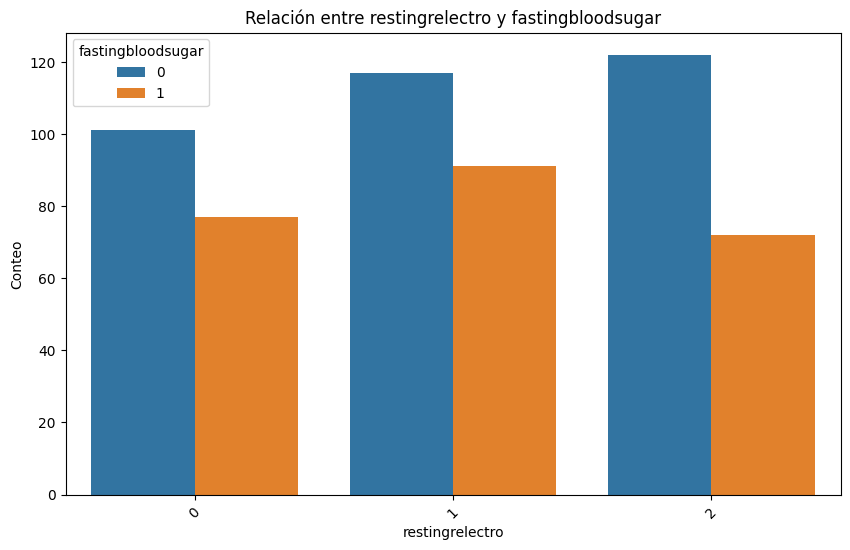

Response0:


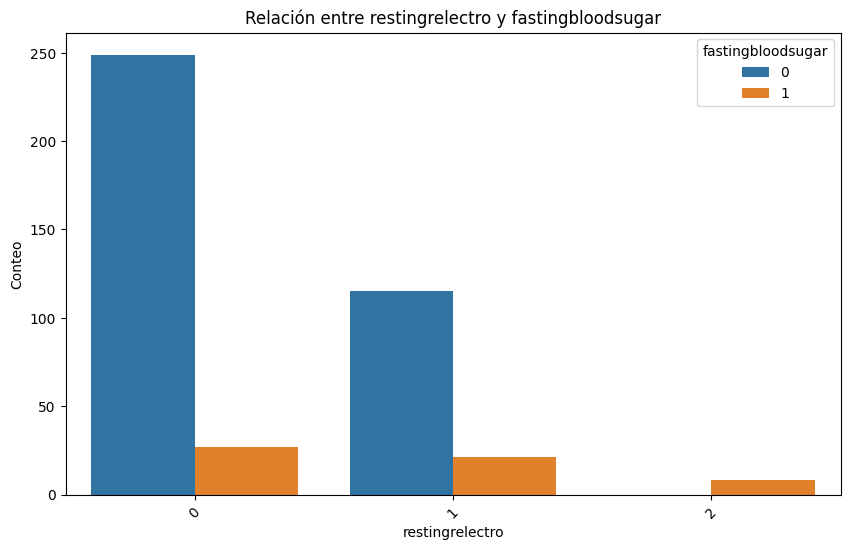

In [24]:
tricategorical_analysis(df, "target", ["fastingbloodsugar","restingrelectro"])

When the goal is to predict the presence of heart disease (target 1), there is no significant variation in the relationships between resting electrocardiogram and fasting glucose level. This suggests that these variables could have a consistent influence on predicting heart disease, regardless of the fasting glucose level.

When predicting the absence of heart disease (target 0), we observe a downward relationship between resting electrocardiogram and fasting glucose level. This implies that a normal resting electrocardiogram (value 0) is more associated with a low fasting glucose level (less than 120 mg/dl). This relationship could indicate that a normal resting electrocardiogram is more likely when fasting glucose is low, which could be an indicator of favorable cardiovascular health.

These conclusions suggest that both resting electrocardiogram and fasting glucose level are relevant factors in assessing cardiovascular health.

- chestpain & restingBP

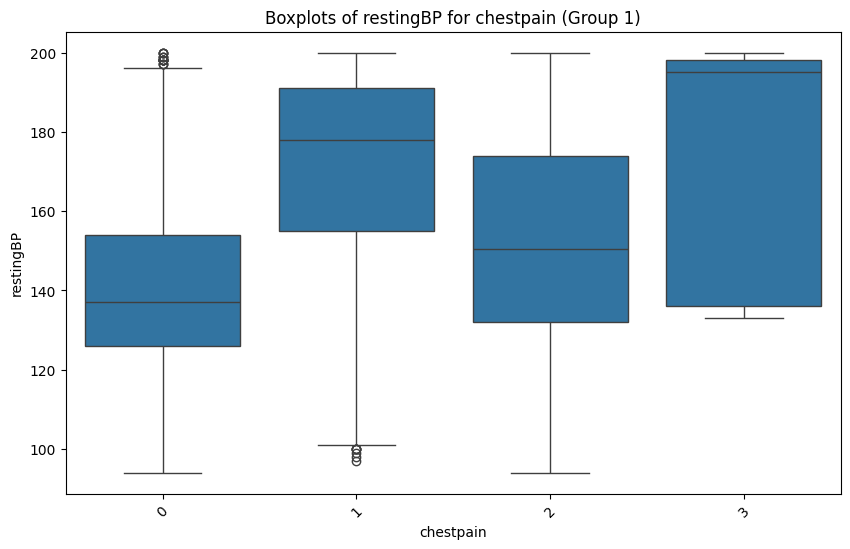

In [25]:
bt.plot_grouped_boxplots(df,"chestpain","restingBP")

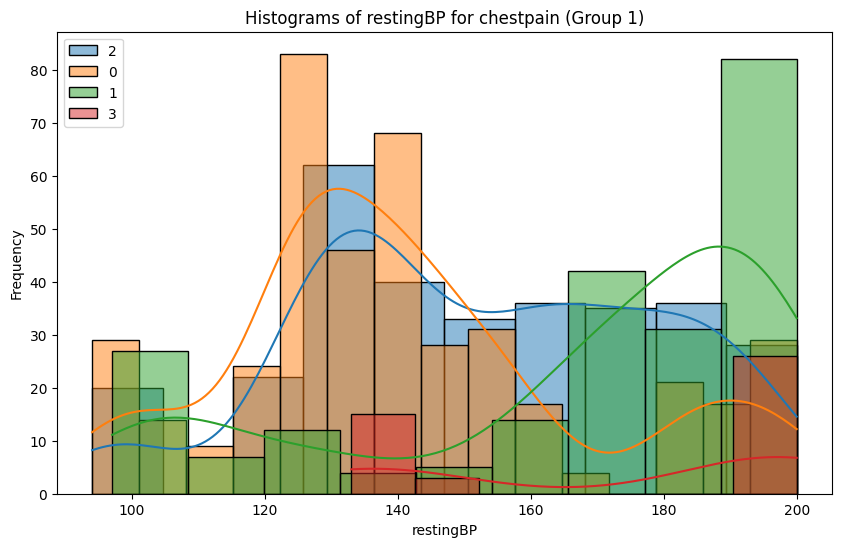

In [30]:
bt.plot_grouped_histograms(df, "chestpain","restingBP", group_size = 4)

Doing the Mann-Whitney U test

In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [33]:
#performing ANOVA test
# Fit the model
model = ols('restingBP ~ C(chestpain)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                     sum_sq     df          F        PR(>F)
C(chestpain)  113841.703889    3.0  48.259242  4.010019e-29
Residual      783175.287111  996.0        NaN           NaN


The very low PR(>F) value (4.010019e-29) suggests significant differences in resting blood pressure (restingBP) among at least two levels of chest pain (chestpain). This implies that chest pain has a statistically significant effect on resting blood pressure, according to the data and model used.

In [37]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['restingBP'], groups=df['chestpain'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  25.3045    0.0  19.3342 31.2748   True
     0      2    10.93    0.0   5.5367 16.3234   True
     0      3  30.9429    0.0  19.5085 42.3772   True
     1      2 -14.3744    0.0 -20.6939 -8.0549   True
     1      3   5.6384 0.6146  -6.2609 17.5376  False
     2      3  20.0128 0.0001   8.3923 31.6333   True
-----------------------------------------------------


group1 vs group2: There is a statistically significant mean difference of 25.3045 in resting blood pressure (restingBP) between these groups (p < 0.05).

group1 vs group3: There is a statistically significant mean difference of 30.9429 in resting blood pressure between these groups (p < 0.05).

group2 vs group3: There is a statistically significant mean difference of 20.0128 in resting blood pressure between these groups (p < 0.05).

- slope & maxheartrate:

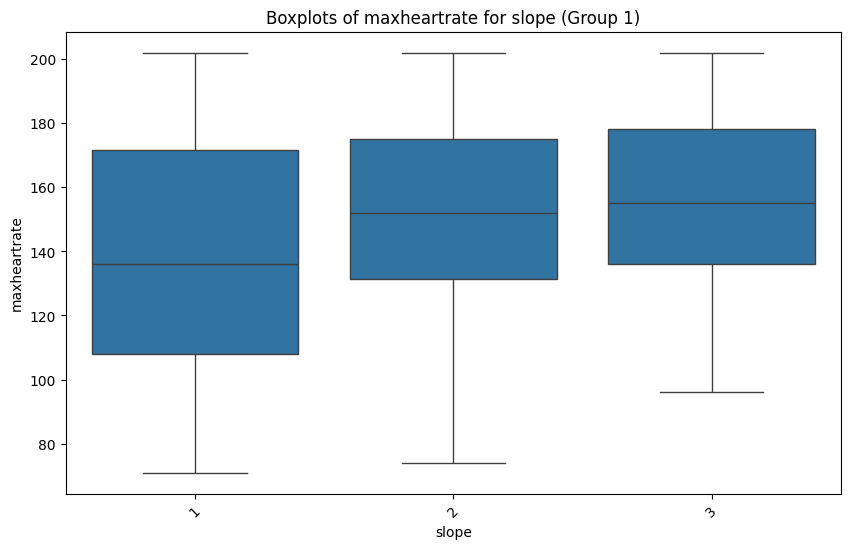

In [38]:
bt.plot_grouped_boxplots(df,"slope","maxheartrate")

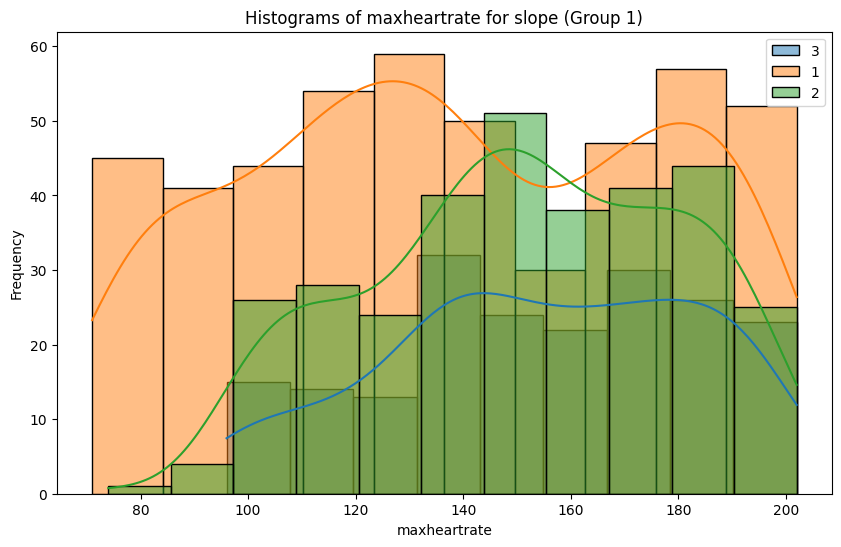

In [41]:
bt.plot_grouped_histograms(df, "slope","maxheartrate", group_size = 3)

In [42]:
#performing ANOVA test
# Fit the model
model = ols('maxheartrate ~ C(slope)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq     df          F        PR(>F)
C(slope)  5.476880e+04    2.0  24.529512  3.988187e-11
Residual  1.113037e+06  997.0        NaN           NaN


The very low p-value (3.988187e-11) for PR(>F) suggests that there is a significant effect of slope on the dependent variable. In other words, the slope variable significantly explains the variability observed in the dependent variable.

The degrees of freedom (df) indicate the number of groups minus one (2 groups for slope), and the total number of observations minus the number of groups (997 observations and 2 groups).

The sum of squares (sum_sq) helps to quantify how much of the total variability in the dependent variable is explained by slope versus how much is left unexplained (residual).

In summary, based on these results, slope appears to have a statistically significant impact on the dependent variable under study.

In [43]:
# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['maxheartrate'], groups=df['slope'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  13.2495    0.0  7.5978 18.9012   True
     1      3  16.7948    0.0 10.1806 23.4091   True
     2      3   3.5453 0.4674 -3.5264  10.617  False
----------------------------------------------------


The adjusted p-values (p-adj) indicate that group1 vs group2 and group1 vs group3 comparisons reject the null hypothesis, suggesting significant differences in means between these groups.

However, there is no significant difference in means between group2 and group3, as indicated by the non-rejection of the null hypothesis.

These findings provide insight into the pairwise differences in means among the groups, considering the specified family-wise error rate (FWER) of 0.05.

Los 3 pares de variables con mayor correlación:
Correlación entre 'slope' y 'target': 0.7598487580422021
Correlación entre 'target' y 'slope': 0.7598487580422021
Correlación entre 'chestpain' y 'target': 0.5542280802925417
Correlación entre 'target' y 'chestpain': 0.5542280802925417
Correlación entre 'noofmajorvessels' y 'target': 0.4898664443846556
Correlación entre 'target' y 'noofmajorvessels': 0.4898664443846556
